In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/yujin/Desktop/대학원/Human-AI interaction and data science/HAI5016_Final Presentation/diabetes_prediction_dataset 2.csv')

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
data.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [7]:
data = data.dropna()

## Feature: Gender


In [11]:
# Mapping gender to numerical values
data['Gen_Val'] = data['gender'].map({'Female': 0, 'Male': 1})
print(data[['gender', 'Gen_Val']].head())

   gender  Gen_Val
0  Female      0.0
1  Female      0.0
2    Male      1.0
3  Female      0.0
4    Male      1.0


In [17]:
gender_counts = data['gender'].value_counts()
print(gender_counts)

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


<Axes: xlabel='Gen_Val'>

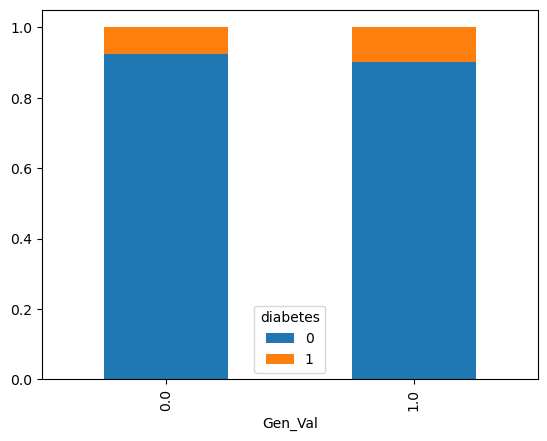

In [12]:
# Create a cross tab for Gen_Val and diabetes
cross_tab_gen_val = pd.crosstab(data['Gen_Val'], data['diabetes'])

# Normalize the cross tab
cross_tab_gen_val_normalized = cross_tab_gen_val.div(cross_tab_gen_val.sum(axis=1), axis=0)

# Plot the normalized cross tab
cross_tab_gen_val_normalized.plot(kind='bar', stacked=True)

## Feature: Age

<Axes: >

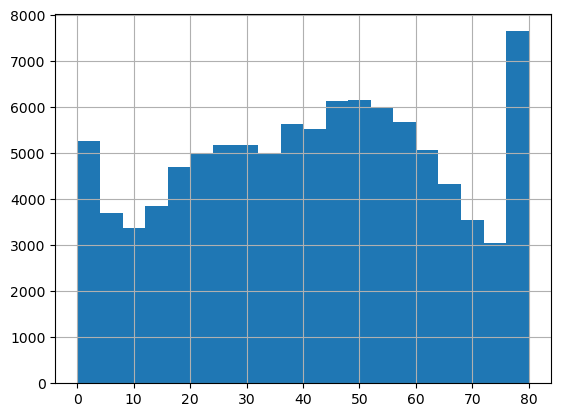

In [16]:
data['age'].hist(bins=20)

<Axes: xlabel='age_bins'>

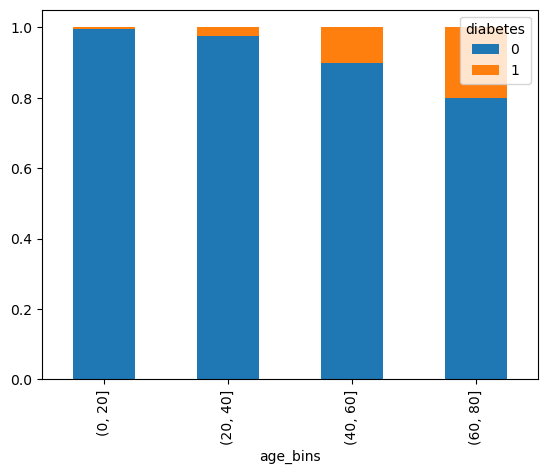

In [13]:
# Create age bins
data['age_bins'] = pd.cut(data['age'], bins=[0, 20, 40, 60, 80, 100])

# Create a cross tab for age_bins and diabetes
cross_tab_age = pd.crosstab(data['age_bins'], data['diabetes'])

# Normalize the cross tab
cross_tab_age_normalized = cross_tab_age.div(cross_tab_age.sum(axis=1), axis=0)

# Plot the normalized cross tab
cross_tab_age_normalized.plot(kind='bar', stacked=True)

## Feature: Hypertention


In [8]:
# Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.

In [9]:
cross_tab = pd.crosstab(data['hypertension'], data['diabetes'])
print(cross_tab)

diabetes          0     1
hypertension             
0             86103  6412
1              5397  2088


<Axes: xlabel='hypertension'>

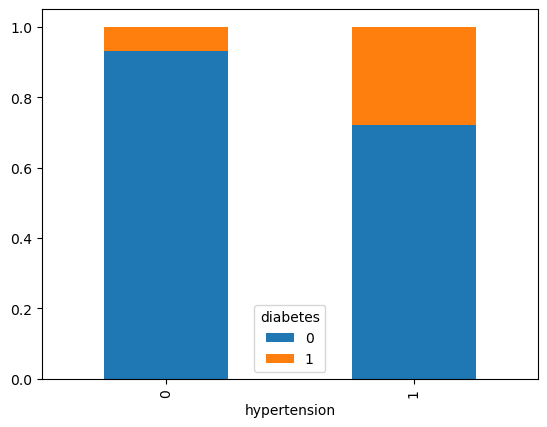

In [10]:
# Normalize the cross tab
cross_tab_normalized = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Plot the normalized cross tab
cross_tab_normalized.plot(kind='bar', stacked=True)

## Feature: Heart Disease

<Axes: xlabel='heart_disease'>

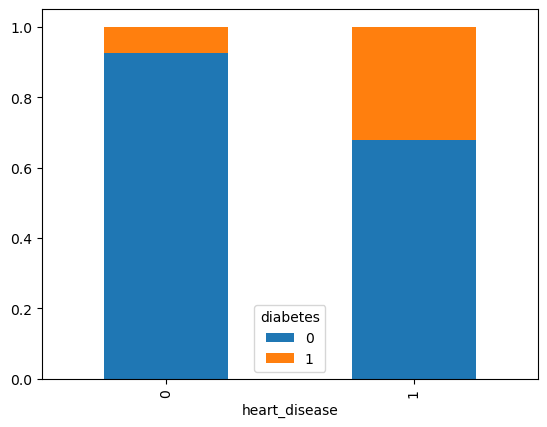

In [14]:
# Create a cross tab for heart_disease and diabetes
cross_tab_heart_disease = pd.crosstab(data['heart_disease'], data['diabetes'])

# Normalize the cross tab
cross_tab_heart_disease_normalized = cross_tab_heart_disease.div(cross_tab_heart_disease.sum(axis=1), axis=0)

# Plot the normalized cross tab
cross_tab_heart_disease_normalized.plot(kind='bar', stacked=True)

## Feature: Smoking History

<Axes: xlabel='smoking_history'>

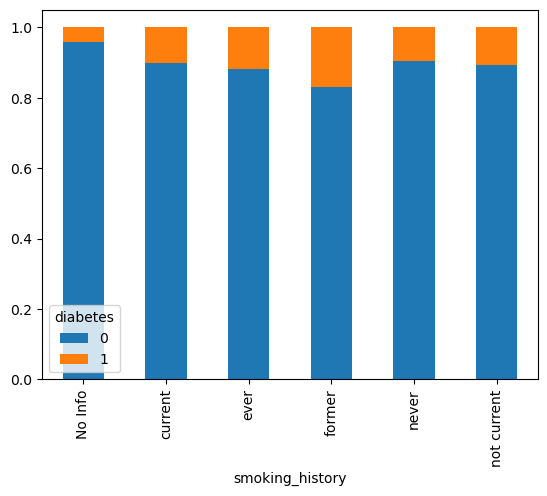

In [15]:
# Create a cross tab for smoking_history and diabetes
cross_tab_smoking = pd.crosstab(data['smoking_history'], data['diabetes'])

# Normalize the cross tab
cross_tab_smoking_normalized = cross_tab_smoking.div(cross_tab_smoking.sum(axis=1), axis=0)

# Plot the normalized cross tab
cross_tab_smoking_normalized.plot(kind='bar', stacked=True)

## Feature: BMI

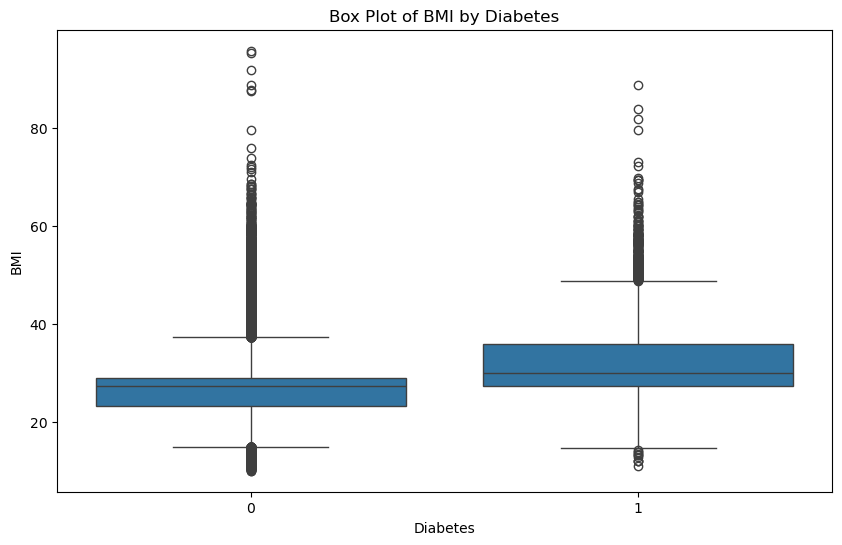

In [21]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a box plot for BMI and diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='bmi', data=data)
plt.title('Box Plot of BMI by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.show()

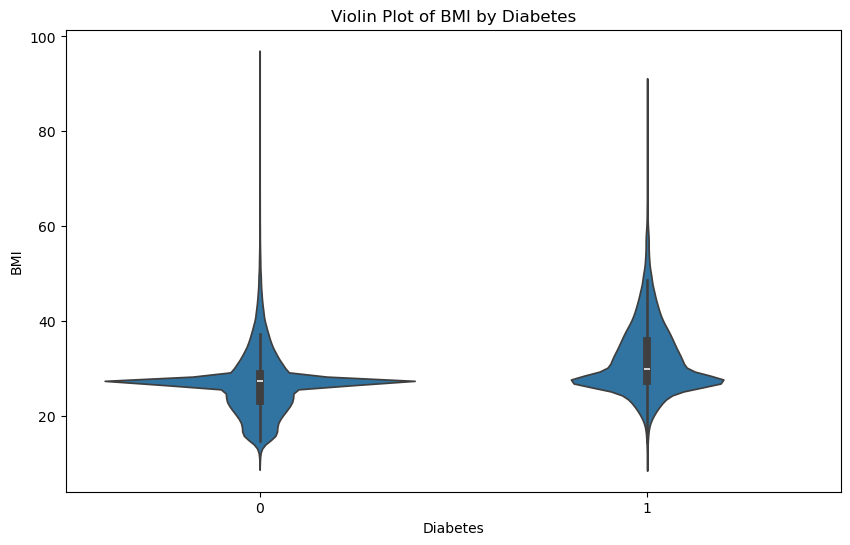

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diabetes', y='bmi', data=data)
plt.title('Violin Plot of BMI by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.show()

## Feature: HbA1c Level

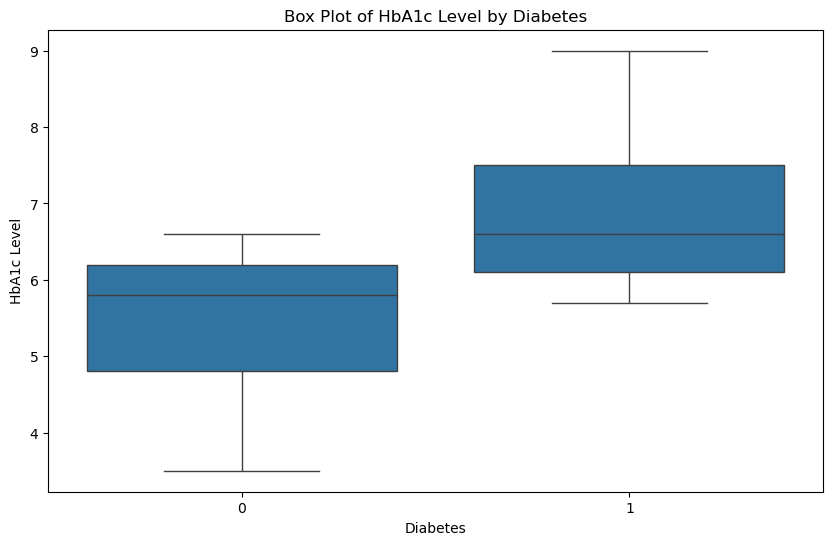

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=data)
plt.title('Box Plot of HbA1c Level by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.show()

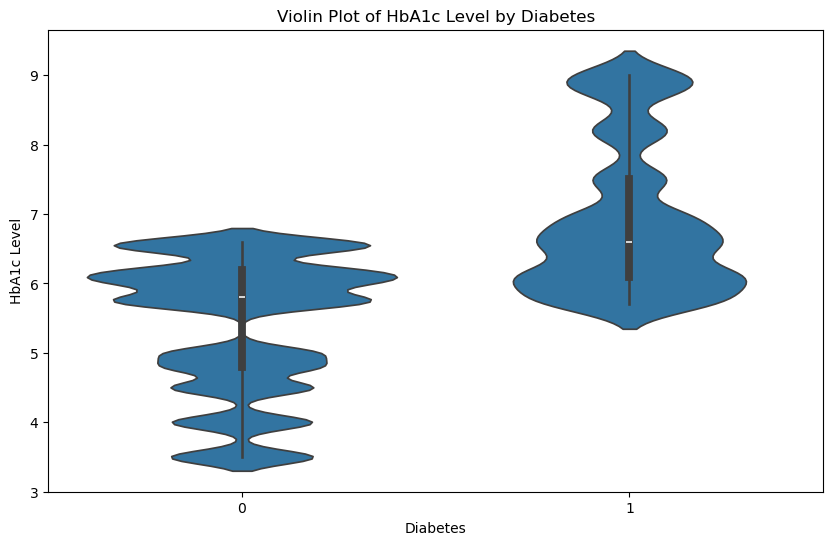

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diabetes', y='HbA1c_level', data=data)
plt.title('Violin Plot of HbA1c Level by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.show()

## Feature: Blood Glucose Level

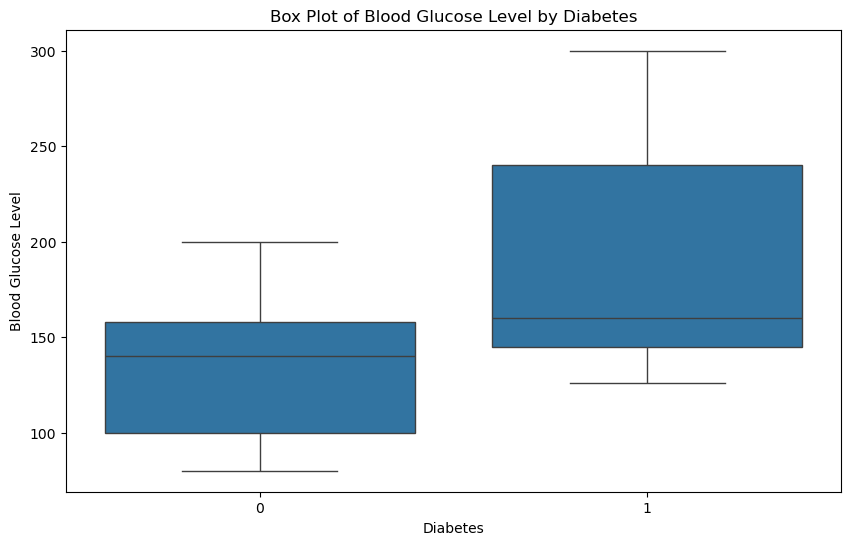

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data)
plt.title('Box Plot of Blood Glucose Level by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.show()

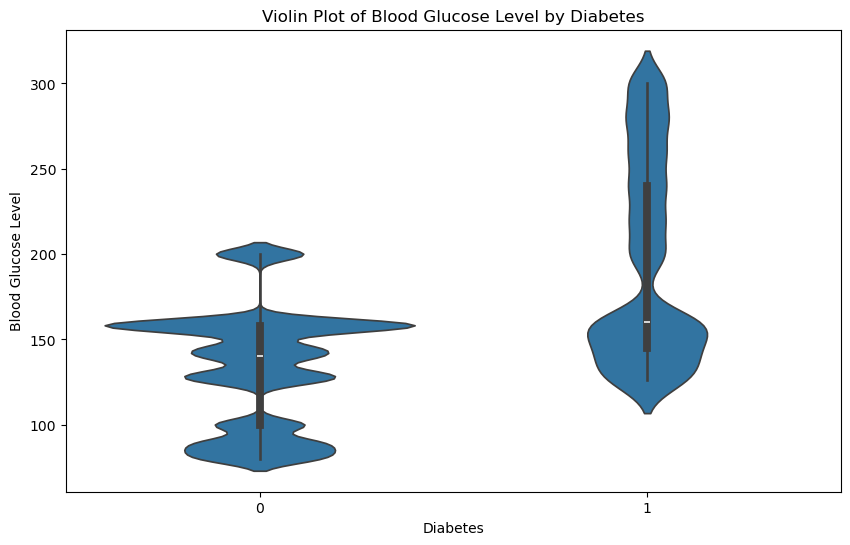

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diabetes', y='blood_glucose_level', data=data)
plt.title('Violin Plot of Blood Glucose Level by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.show()